# Introduction to pandas

* **pandas** is a Python package providing convenient data structures to work with labelled data.

* **pandas** is perfectly suited for observational / statistical data sets, having many similarities with Excel spreadsheets.

* Key features:

    - easy handling of **missing data**
    - **size mutability**: columns can be inserted and deleted from DataFrame
    - automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
    - powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets
    - make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
    - intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of large data sets
    - intuitive **merging** and **joining** data sets
    - flexible **reshaping** and pivoting of data sets
    - **hierarchical** labeling of axes (possible to have multiple labels per tick)
    - robust IO tools for loading data from **flat files** (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
    - **time series**-specific functionality

### Primary data structures of pandas
* **Series** (1-dimensional)
* **DataFrame** (2-dimensional)

pandas is built on top of **NumPy** and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

## Loading data

* In this part, we will use observations of the air quality as an example
* The data have been collected **hourly** from one of the monitoring sites in London (Marleybone Road) **over the year 2015**
* Measured are: ozone ($O_3$), nitrogen oxides (NOx), carbon monoxide (CO) and PM10 particulate matter

* Data source: https://uk-air.defra.gov.uk/data/
* Site description: https://uk-air.defra.gov.uk/networks/site-info?uka_id=UKA00315

First, we import pandas module. We use an alias "pd" to write code quicker.

In [1]:
import pandas as pd

We also import the `os` module that is useful for building paths to files (among many other things). And `numpy` with `matplotlib` just in case too.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
fname = '../data/air_quality_hourly_london_marylebone.csv'

Let's try to read the data using `pandas.read_csv()` function.

In [5]:
# minimal setup to read the given file
air_quality = pd.read_csv(fname, header=4, skipfooter=4, na_values='No data', engine='python')

**Q**: What happens if you remove the header? skipfooter? engine?

## Data structures: `DataFrame` and `Series`

Let's interrogate the `DataFrame` object!

In [6]:
type(air_quality)

pandas.core.frame.DataFrame

In [7]:
# Internal nature of the object
print(air_quality.shape)
print()
print(air_quality.dtypes)

(8760, 12)

Start date                                    object
End Date                                      object
Ozone                                        float64
Status                                        object
Nitrogen oxides as nitrogen dioxide          float64
Status.1                                      object
Carbon monoxide                              float64
Status.2                                      object
PM10 particulate matter (Hourly measured)    float64
Status.3                                      object
Cobalt                                       float64
Status.4                                     float64
dtype: object


In [8]:
# View just the tip of data
air_quality.head(5)

,Start date,End Date,Ozone,Status,Nitrogen oxides as nitrogen dioxide,Status.1,Carbon monoxide,Status.2,PM10 particulate matter (Hourly measured),Status.3,Cobalt,Status.4
0,2015-01-01,01:00:00,13.70381,V ugm-3,177.01526,V ugm-3,0.375260,V mgm-3,39.3,V ugm-3 (TEOM FDMS),NaN,NaN
1,2015-01-01,02:00:00,8.58151,V ugm-3,294.46380,V ugm-3,0.542517,V mgm-3,41.1,V ugm-3 (TEOM FDMS),NaN,NaN
2,2015-01-01,03:00:00,9.77893,V ugm-3,209.99537,V ugm-3,0.406306,V mgm-3,35.1,V ugm-3 (TEOM FDMS),NaN,NaN
3,2015-01-01,04:00:00,13.96990,V ugm-3,160.89863,V ugm-3,0.281445,V mgm-3,27.6,V ugm-3 (TEOM FDMS),NaN,NaN
4,2015-01-01,05:00:00,15.66625,V ugm-3,153.89362,V ugm-3,0.250303,V mgm-3,27.9,V ugm-3 (TEOM FDMS),NaN,NaN


**Q:** What did you notice about "Status" columns? Compare them to the original text file.

In [9]:
# View the last rows of data
air_quality.tail(n=2)  # Note the optional argument (available for head() too)

,Start date,End Date,Ozone,Status,Nitrogen oxides as nitrogen dioxide,Status.1,Carbon monoxide,Status.2,PM10 particulate matter (Hourly measured),Status.3,Cobalt,Status.4
8758,2015-12-31,23:00:00,5.63785,V ugm-3,323.28183,V ugm-3,0.842881,V mgm-3,NaN,V ugm-3 (TEOM FDMS),NaN,NaN
8759,2015-12-31,24:00:00,4.83957,V ugm-3,290.91803,V ugm-3,0.722095,V mgm-3,NaN,V ugm-3 (TEOM FDMS),NaN,NaN


Get descriptors for the **vertical** axis (axis=0):

In [10]:
air_quality.index

RangeIndex(start=0, stop=8760, step=1)

Get descriptors for the horizontal axis (axis=1):

In [11]:
air_quality.columns

Index(['Start date', 'End Date', 'Ozone', 'Status',
       'Nitrogen oxides as nitrogen dioxide', 'Status.1', 'Carbon monoxide',
       'Status.2', 'PM10 particulate matter (Hourly measured)', 'Status.3',
       'Cobalt', 'Status.4'],
      dtype='object')

A lot of information at once including memory usage:

In [12]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
Start date                                   8760 non-null object
End Date                                     8760 non-null object
Ozone                                        8601 non-null float64
Status                                       8760 non-null object
Nitrogen oxides as nitrogen dioxide          8640 non-null float64
Status.1                                     8760 non-null object
Carbon monoxide                              8539 non-null float64
Status.2                                     8760 non-null object
PM10 particulate matter (Hourly measured)    8502 non-null float64
Status.3                                     8760 non-null object
Cobalt                                       0 non-null float64
Status.4                                     0 non-null float64
dtypes: float64(6), object(6)
memory usage: 821.3+ KB


### Series, pandas' 1D data containter

A series can be constructed with the `pd.Series` constructor (passing an array of values) or from a `DataFrame`, by extracting one of its columns.

In [13]:
carbon_monoxide = air_quality['Carbon monoxide']

Some of its attributes:

In [14]:
print(type(carbon_monoxide))
print(carbon_monoxide.dtype)
print(carbon_monoxide.shape)
print(carbon_monoxide.nbytes)

<class 'pandas.core.series.Series'>
float64
(8760,)
70080


Show me what you got! <img src=https://staticdelivery.nexusmods.com/mods/1151/images/543-1-1447533110.png style="width:40px;">

In [15]:
carbon_monoxide

0       0.375260
1       0.542517
2       0.406306
3       0.281445
4       0.250303
5       0.312879
6       0.406306
7       0.312588
8       0.312588
9       0.312588
10      0.343730
11      0.312588
12      0.343730
13      0.374872
14      0.406306
15      0.406597
16      0.437739
17      0.406306
18      0.374872
19      0.437739
20      0.343730
21      0.250303
22      0.281445
23      0.250303
24      0.166481
25      0.124569
26      0.156003
27      0.124569
28      0.156003
29      0.124569
          ...   
8730    0.692990
8731    0.663012
8732    0.512248
8733    0.572786
8734    0.572495
8735    0.391171
8736    0.441620
8737    0.361290
8738    0.270968
8739    0.300946
8740    0.210720
8741    0.391462
8742    0.571913
8743    0.421440
8744    0.451710
8745    0.451419
8746    0.602182
8747    0.602182
8748    0.691826
8749    0.601891
8750    0.812612
8751    0.571913
8752    0.692117
8753    0.511957
8754    0.932815
8755    0.782342
8756    0.903128
8757    0.8425

### Numpy as pandas's backend

It is always possible to fall back to a good old NumPy array to pass on to scientific libraries that need them: SciPy, scikit-learn, etc

In [16]:
air_quality['Nitrogen oxides as nitrogen dioxide'].values

array([ 177.01526,  294.4638 ,  209.99537, ...,  314.07697,  323.28183,
        290.91803])

In [17]:
type(air_quality['Nitrogen oxides as nitrogen dioxide'].values)

numpy.ndarray

## Cleaning data

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">The truth about data science: cleaning your data is 90% of the work. Fitting the model is easy. Interpreting the results is the other 90%.</p>&mdash; Jake VanderPlas (@jakevdp) <a href="https://twitter.com/jakevdp/status/742406386525446144">June 13, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

### Dealing with dates and times

In [18]:
# def dateparse(date_str, time_str):
#     diff = pd.to_timedelta((df['End Date'] == '24:00:00').astype(int), unit='d')
#     pd.datetime.strptime(x+y, '%Y-%m-%d%H:%M:%S') 

In [19]:
air_quality = pd.read_csv(fname, header=4, skipfooter=4, na_values='No data', engine='python',
                          parse_dates={'Time': [0, 1]})

### Renaming columns

In [20]:
air_quality.columns = ['Time', 'O3', 'O3_status', 'NOx', 'NOx_status',
                       'CO', 'CO_status', 'PM10', 'PM10_status', 'Co', 'Co_status']
air_quality.columns

Index(['Time', 'O3', 'O3_status', 'NOx', 'NOx_status', 'CO', 'CO_status',
       'PM10', 'PM10_status', 'Co', 'Co_status'],
      dtype='object')

### Deleting columns

Let us concentrate our attention on the first 4 chemical species, and remove cobalt data from our `DataFrame`:

In [21]:
air_quality = air_quality.drop('Co', 1)
air_quality = air_quality.drop('Co_status', 1)

In [22]:
air_quality.head()

,Time,O3,O3_status,NOx,NOx_status,CO,CO_status,PM10,PM10_status
0,2015-01-01 01:00:00,13.70381,V ugm-3,177.01526,V ugm-3,0.375260,V mgm-3,39.3,V ugm-3 (TEOM FDMS)
1,2015-01-01 02:00:00,8.58151,V ugm-3,294.46380,V ugm-3,0.542517,V mgm-3,41.1,V ugm-3 (TEOM FDMS)
2,2015-01-01 03:00:00,9.77893,V ugm-3,209.99537,V ugm-3,0.406306,V mgm-3,35.1,V ugm-3 (TEOM FDMS)
3,2015-01-01 04:00:00,13.96990,V ugm-3,160.89863,V ugm-3,0.281445,V mgm-3,27.6,V ugm-3 (TEOM FDMS)
4,2015-01-01 05:00:00,15.66625,V ugm-3,153.89362,V ugm-3,0.250303,V mgm-3,27.9,V ugm-3 (TEOM FDMS)


## Basic visualisation

### Exercise

Try calling `plot()` method of the `air_quality` object:

In [23]:
# air_quality.plot()

What happens if put `subplots=True` as an argument of the `plot()` method?

In [24]:
# air_quality.plot( ... )

It is easy to create other useful plots using `DataFrame`:

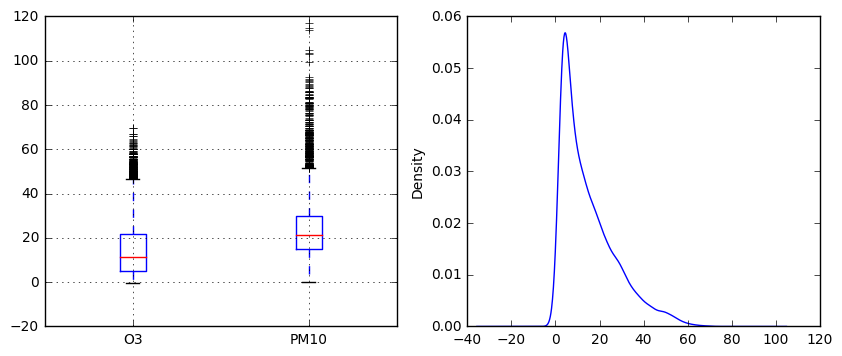

In [25]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
air_quality.boxplot(ax=ax0, column=['O3', 'PM10'])
air_quality.O3.plot(ax=ax1, kind="kde")

As well as just a simple line plot:

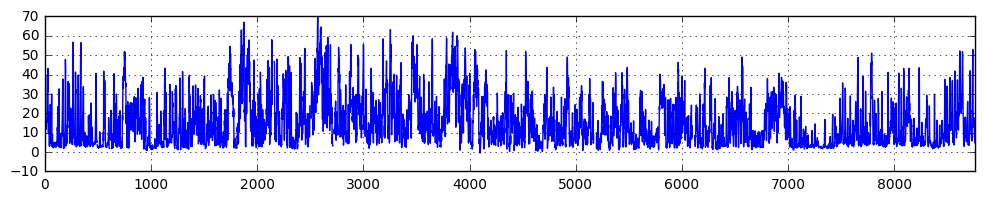

In [26]:
air_quality.O3.plot(grid=True, figsize=(12, 2))

### Setting missing values

As you may notice, we have negative values of ozone concentration, which does not make sense. So, let us replace those negative values with NaN:

In [27]:
air_quality[air_quality.O3.values < 0]

,Time,O3,O3_status,NOx,NOx_status,CO,CO_status,PM10,PM10_status
4100,2015-06-20 21:00:00,-0.54882,V ugm-3,309.70164,V ugm-3,0.650497,V mgm-3,28.4,V ugm-3 (TEOM FDMS)
4101,2015-06-20 22:00:00,-0.14968,V ugm-3,338.11996,V ugm-3,0.792238,V mgm-3,27.1,V ugm-3 (TEOM FDMS)


We can mask them out in the same way as you do with numpy arrays:

In [28]:
# Replace negative ozone values with NaN
air_quality.O3[air_quality.O3.values < 0] = np.nan

## Saving data

For each `read_**` function to load data, there is a `to_**` method attached to `Series` and `DataFrames`.

#### Excel spreadsheets

Uncomment the following code cell and run to save the whole `DataFrame` to an Excel file.

In [29]:
# with pd.ExcelWriter("test.xls") as our_writer:
#     air_quality.to_excel(writer, sheet_name='Blah-blah')

#### Exercise: writing to CSV text files

Find a method to save `DataFrames` to a text file (or whatever format you like more).

In [30]:
# Your code here

## Some statistics

In [31]:
air_quality.describe()

,O3,NOx,CO,PM10
count,8599.000000,8640.000000,8539.000000,8502.000000
mean,15.109839,298.584537,0.508970,24.098553
std,12.427924,205.757696,0.248388,13.043507
min,0.199570,18.447340,0.000000,0.000000
25%,5.039140,135.326110,0.324230,15.200000
50%,11.425380,241.762950,0.468008,21.500000
75%,21.703240,431.754645,0.661994,29.700000
max,69.749710,1409.545970,1.978267,117.100000


## Correlations and regressions

* Is there correlations between the timeseries we loaded?
* First, let's take a glance at the whole `DataFrame` using a fancy `scatter_matrix` function.

In [32]:
from pandas.tools.plotting import scatter_matrix

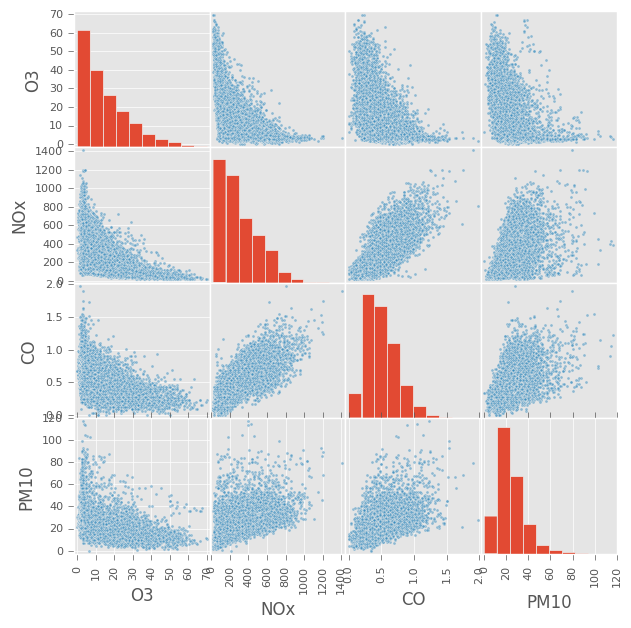

In [33]:
with plt.style.context('ggplot'):
    scatter_matrix(air_quality, figsize=(7, 7))

## Computing correlations

Both `Series` and `DataFrames` have a **`corr()`** method to compute the correlation coefficient.

In [34]:
air_quality.NOx.corr(air_quality['CO'])

0.7712297105293433

If series are already grouped into a `DataFrame`, computing all correlation coefficients is trivial:

In [35]:
air_quality.corr()

,O3,NOx,CO,PM10
O3,1.000000,-0.616442,-0.562254,-0.448305
NOx,-0.616442,1.000000,0.771230,0.529790
CO,-0.562254,0.771230,1.000000,0.532399
PM10,-0.448305,0.529790,0.532399,1.000000


If you want to visualise this correlation matrix, uncomment the following code cell.

In [36]:
# fig, ax = plt.subplots()
# p = ax.imshow(air_quality.corr(), interpolation="nearest", cmap='RdBu_r', vmin=-1, vmax=1)
# ax.set_xticks(np.arange(len(air_quality.corr().columns)))
# ax.set_yticks(np.arange(len(air_quality.corr().index)))
# ax.set_xticklabels(air_quality.corr().columns)
# ax.set_yticklabels(air_quality.corr().index)
# fig.colorbar(p)

## Creating DataFrames

* `DataFrame` can also be created manually, by grouping several `Series` together.
* Now just for fun we switch to **another dataset**:
    - create 2 `Series` objects from 2 CSV files
    - create a `DataFrame` by combining the two `Series`

In [37]:
soi_df = pd.read_csv('../data/soi.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

In [38]:
olr_df = pd.read_csv('../data/olr.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

In [39]:
df = pd.DataFrame({'OLR': olr_df.Value,
                   'SOI': soi_df.Value})

In [40]:
df.describe()

,OLR,SOI
count,493.000000,790.000000
mean,0.035294,0.123544
std,0.978162,0.950473
min,-2.600000,-3.600000
25%,-0.600000,-0.500000
50%,0.100000,0.100000
75%,0.700000,0.800000
max,2.400000,2.900000


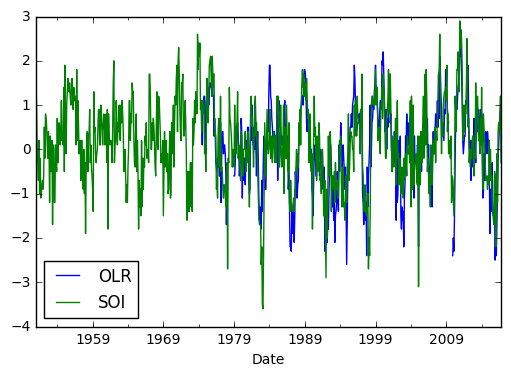

In [41]:
df.plot()

## Ordinary Least Square (OLS) regressions 

<img src=http://statsmodels.sourceforge.net/devel/_static/statsmodels_hybi_banner.png>

The recommeded way to build ordinaty least square regressions is by using `statsmodels`.

In [42]:
import statsmodels.formula.api as sm

In [43]:
sm_model = sm.ols(formula="SOI ~ OLR", data=df).fit()

In [44]:
# df['SOI'].plot()
# df['OLR'].plot()
# ax = sm_model.fittedvalues.plot(label="model prediction")
# ax.legend(loc="lower center", ncol=3)

### Exercise: create a scatter plot

* You can use `df.plot` function with the appropriate keywords
* What happens if you use "c=" keyword?
* Pass another parameter: `edgecolors='none'`

In [45]:
# your code here

### Advanced scatter plot

Using the power of matplotlib, we can create a scatter plot with points coloured by the date index. To do this we need to import one additional submodule:

In [46]:
import matplotlib.dates as mdates

Convert `numpy.datetime64` objects (which are the indices of our `DataFrame`) to matplotlib floating point numbers. These numbers represent the number of days (fraction part represents hours, minutes, seconds) since 0001-01-01 00:00:00 UTC (assuming Gregorian calendar).

In [47]:
mdt = mdates.date2num(df.index.astype(pd.datetime))

Append the new data to the original `DataFrame`:

In [48]:
df['mpl_date'] = mdt

Create a scatter plot

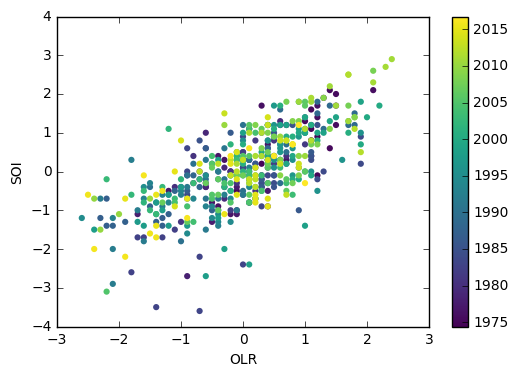

In [49]:
ax = df.plot(kind='scatter', x='OLR', y='SOI', c='mpl_date',
             colormap='viridis', colorbar=False, edgecolors='none')
plt.colorbar(ax.collections[0], ticks=mdates.YearLocator(5), 
             format=mdates.DateFormatter('%Y'))

## Exercise: rolling functions

**1. Subset data**

* Start by subsetting the SOI `DataFrame`
* Use either numerical indices, or, even better, datetime indices

In [50]:
sub_soi_df = soi_df['1992':'2015']
sub_soi_df.head()

,Value
Date,
1992-01-01,-2.9
1992-02-01,-0.9
1992-03-01,-2.0
1992-04-01,-1.0
1992-05-01,0.3


**2. Plot the subset data**

* You can create figure and axis using `matplotlib.pyplot`
* Or just use the `plot()` method of pandas `DataFrame`

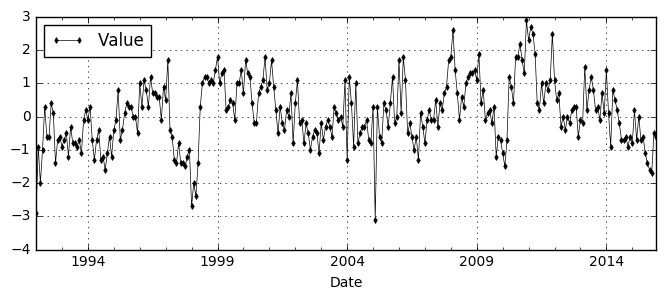

In [51]:
sub_soi_df.plot(lw=0.5, marker='d', ms=3, linestyle='-', color='k', figsize=(8, 3), grid=True)

**3. Explore what `rolling()` method is**

* What does this method return?

In [52]:
# df.rolling?

In [53]:
roll = sub_soi_df.rolling(window=10, center=False)

**4. Plot the original series and the smoothed series**

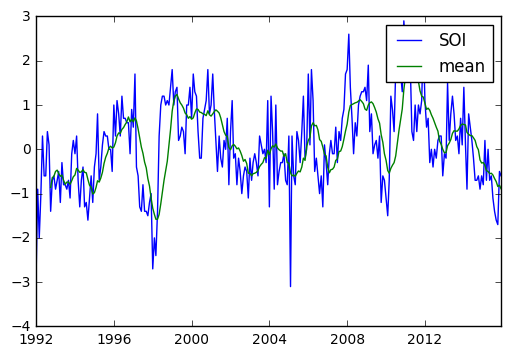

In [54]:
fig, ax = plt.subplots()
ax.plot(sub_soi_df, label='SOI')
ax.plot(roll.mean(), label='mean')
leg = ax.legend()

## References
* https://github.com/jonathanrocher/pandas_tutorial
* https://github.com/koldunovn/python_for_geosciences
* http://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas
* http://pandas.pydata.org/pandas-docs/stable/10min.html